In [42]:
# Importing the libraries
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [43]:
# Reading the Data file
df = pd.read_csv('imdb_master.csv',encoding='latin-1',error_bad_lines=False)
print(df.head())

b'Skipping line 10955: expected 5 fields, saw 16\nSkipping line 11782: expected 5 fields, saw 16\n'


   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [44]:
# Features and Target Extraction
sentences = df['review'].values
y = df['label'].values

In [45]:
# Tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [46]:
# getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [47]:
# Label Encoding the Target ,Splitting the data
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [48]:
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [49]:
# Model Implementation
model = Sequential()
model.add(layers.Dense(300,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 52668 samples, validate on 17556 samples
Epoch 1/5
52668/52668 [==============================] - 6s 104us/step - loss: 0.7184 - acc: 0.7081 - val_loss: 0.6925 - val_acc: 0.7101
Epoch 2/5
52668/52668 [==============================] - 5s 103us/step - loss: 0.6349 - acc: 0.7210 - val_loss: 0.6961 - val_acc: 0.7100
Epoch 3/5
52668/52668 [==============================] - 5s 102us/step - loss: 0.5439 - acc: 0.7622 - val_loss: 0.7227 - val_acc: 0.7030
Epoch 4/5
52668/52668 [==============================] - 5s 103us/step - loss: 0.3801 - acc: 0.8603 - val_loss: 0.7605 - val_acc: 0.6871
Epoch 5/5
52668/52668 [==============================] - 7s 125us/step - loss: 0.2007 - acc: 0.9534 - val_loss: 0.8704 - val_acc: 0.6832


In [50]:
# Model Evaluation
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

17556/17556 [==============================] - 1s 77us/step
Evaluation result on Test Data : Loss = 0.8703606800789658, accuracy = 0.6832422018051147


In [51]:
# Loss and Accuracy Curve
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


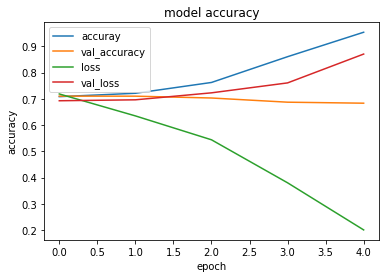

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [53]:
# Adding Embedding Layer
# Pre processing for Embedding Layer

from keras.preprocessing.sequence import pad_sequences
pureSentences = df['review'].values
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)

148223
2470


In [54]:
# Model implementation adding Embedding Layer
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

# Model Evaluation
[test_loss1, test_acc1] = m.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss1, test_acc1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 52668 samples, validate on 17556 samples
Epoch 1/5
52668/52668 [==============================] - 344s 7ms/step - loss: 0.8830 - acc: 0.7013 - val_loss: 0.7531 - val_acc: 0.7113
Epoch 2/5
52668/52668 [==============================] - 345s 7ms/step - loss: 0.6832 - acc: 0.7140 - val_loss: 0.7127 - val_acc: 0.7102
Epoch 3/5
52668/52668 [==============================] - 340s 6ms/step - loss: 0.5372 - acc: 0.7707 - val_loss: 0.7834 - val_acc: 0.6690
Epoch 4/5
52668/52668 [==============================] - 342s 6ms/step - loss: 0.3495 - acc: 0.8680 - val_loss: 0.9601 - val_acc: 0.6337
Epoch 5/5
17556/17556 [==============================] - 36s 2ms/step
Evaluation result on Test Data : Loss = 1.2498683868059675, accuracy = 0.6357940435409546


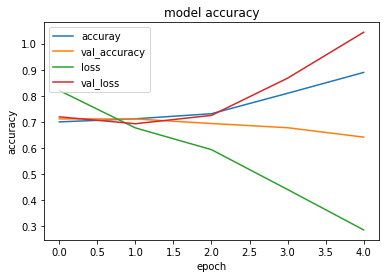

In [40]:
# Loss and Accuracy Curve after adding Embedding Layer
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [41]:
pred = m.predict_classes(X_test[[2],:])
print("Actual Prediction",y_test[1],"Predicted Prediction", pred)

Actual Prediction 2 Predicted Prediction [2]
